# Efficient Coding

Alana Jaskir <br>
Brown University, Providence, RI, USA <br>
Laboratory for Neural Computation and Cognition <br>
Michael Frank <br>

In [21]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import sys
import os

path1 = ".."
sys.path.insert(1, os.path.join(sys.path[0], path1))
import opal
from opal import OpAL
import learning
import plot_dynamics

In [22]:
import importlib
importlib.reload(plot_dynamics)

<module 'plot_dynamics' from '/Users/ajaskir/Desktop/FYP/opal/notebooks/../plot_dynamics.py'>

In [23]:
# initialize parameters
alpha_c = 0.05 # not used
alpha_a = 1.
beta = .5
params = (alpha_c,alpha_a, beta)

k = 0.09
anneal = True
T = 10
phi = 1.0

n_sims = 200
n_trials = 300
v0 = np.array([0.,0.])
rho = 0.0
baselinerho = 0.0
r_mag = 1   # not accurate
l_mag = -1  # not accurate
mag = r_mag - l_mag
p_gamble = .5

# simulations use a Bayesian critic though qualitative patterns not dependent on choice of critic
crit = "Bayes-SA"  # only one option - go-gamble, no go-don't gamble - so set to "S" and v=0.5 if not using Bayes-SA
mod = "avg_gamble_value"
plot_all = True
plt.rcParams.update({'font.size': 22})

## Efficient Coding and Risky Choice

In [24]:
# run the simulations
rnd_seeds = np.random.randint(1,100000,n_sims)      # use same random seed to limit variance
states_increasing = learning.simulate(params,n_sims,n_trials,v0=v0,crit=crit,env="ECincreasing",mod=mod,k=k,norm=True,mag=mag,anneal=anneal,T=T,phi=phi,r_mag=r_mag,l_mag=l_mag,hebb=True, rnd_seeds = rnd_seeds, gamble=True, p_gamble=p_gamble, baselinerho = baselinerho)
states_decreasing = learning.simulate(params,n_sims,n_trials,v0=v0,crit=crit,env="ECdecreasing",mod=mod,k=k,norm=True,mag=mag,anneal=anneal,T=T,phi=phi,r_mag=r_mag,l_mag=l_mag,hebb=True, rnd_seeds = rnd_seeds, gamble=True, p_gamble=p_gamble, baselinerho = baselinerho)

/var/folders/x1/w7n6h7cn2z17zbtntm879lcw0000gp/T/ipykernel_63613/51531011.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels([300,300,400,500,600])


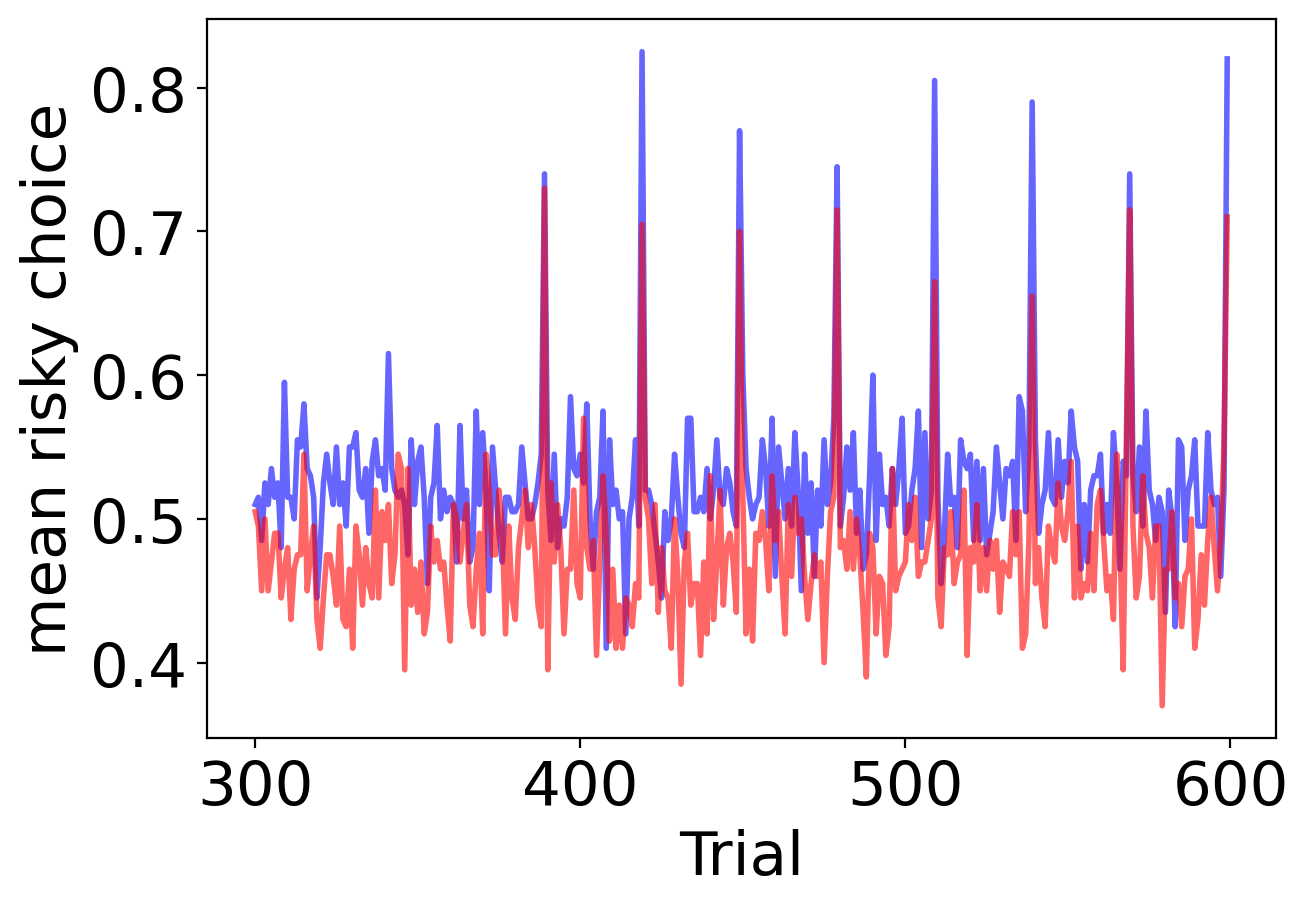

In [25]:
# plot average sm
fig, axs = plt.subplots(figsize=(7, 5),dpi=200)
plotme = states_increasing
plot_dynamics.avg_choice_gamble(plotme,n_trials,n_sims,0,axs,"blue",opacity=0.6)
plotme = states_decreasing
plot_dynamics.avg_choice_gamble(plotme,n_trials,n_sims,0,axs,"red",opacity=0.6)
# plt.legend(["Increasing","Decreasing"], bbox_to_anchor=(1., 1.0), loc='upper left')
plt.xlabel("Trial")
# plt.ylabel("$\overline{p}$(gamble)")
plt.ylabel("mean risky choice")
axs.set_xticklabels([300,300,400,500,600])
plt.locator_params(axis="y", nbins=10)
plt.tight_layout()

# Gambling on common trials - Increasing vs. Decreasing prior

In [26]:
# average
common_trials = np.array([90,120,150,180,210,240,270,300])-1

xaxis = [0,1]
perc_inc = np.zeros((n_sims, 1))
inc_avgSM = np.zeros((n_sims, 1))
dec_avgSM = np.zeros((n_sims, 1))
for sim_idx, sim_inc in enumerate(states_increasing):
    increasing_prob = np.mean(np.take(sim_inc.C,common_trials))
    decreasing_prob = np.mean(np.take(states_decreasing[sim_idx].C,common_trials))
    perc_inc[sim_idx] = (increasing_prob/decreasing_prob)
    inc_avgSM[sim_idx] = increasing_prob
    dec_avgSM[sim_idx] = decreasing_prob
print(np.mean(perc_inc))
print(stats.sem(perc_inc))
print(np.mean(inc_avgSM),np.mean(dec_avgSM))
print(stats.sem(inc_avgSM),stats.sem(dec_avgSM))


1.2062023809523807
[0.03527606]
0.779375 0.699375
[0.01025651] [0.01155666]


In [27]:
# from Frydman data
dataMeans = [.78163993,.69809687]
dataSems = [.0123392,.0135083]

(0.5, 0.8)

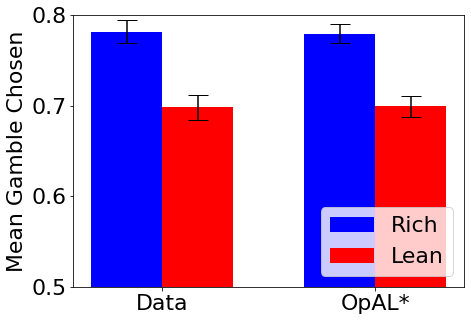

In [28]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar([0.0], dataMeans[0], width=0.5, yerr=dataSems[0], align='center', color=["blue"], ecolor='black', capsize=10)
ax.bar([0.5], dataMeans[1], width=0.5, yerr=dataSems[1], align='center', color=["red"], ecolor='black', capsize=10)
ax.bar([1.5], np.mean(inc_avgSM), width=0.5, yerr=stats.sem(inc_avgSM)[0], align='center', color="blue", ecolor='black', capsize=10)
ax.bar([2.0], np.mean(dec_avgSM), width=0.5, yerr=stats.sem(dec_avgSM)[0], align='center', color="red", ecolor='black', capsize=10)
ax.set_xticks([0.25,1.75])
ax.set_xticklabels(["Data","OpAL*"])
ax.legend(["Rich","Lean"], loc='lower right')
plt.ylabel("Mean Gamble Chosen")
ax.set_ylim([0.5,0.8])

In [29]:
# respecting common trials are the same gamble
common_trials = np.array([90,120,150,180,210,240,270,300])-1

xaxis = [0,1]
perc_inc = np.zeros((n_sims, 1))
for sim_idx, sim_inc in enumerate(states_increasing):
    # will be same X for inc/dec, so can directly compare increase prob
    increasing_prob = np.take(sim_inc.SM,common_trials)   
    decreasing_prob = np.take(states_decreasing[sim_idx].SM,common_trials)
    perc_inc[sim_idx] = np.mean(increasing_prob/decreasing_prob)
print(np.mean(perc_inc))
print(stats.sem(perc_inc))

1.1132886537137952
[0.00016136]


In [30]:
# sanity check that the common X trials are rearranged in same order because same random seed
for i in np.arange(n_sims):
    if all(states_decreasing[i].common_X == states_increasing[i].common_X):
        continue
    else:
        print("False")

for i in np.arange(n_sims):
    if all(np.take(states_increasing[i].Xs,common_trials) == np.take(states_decreasing[i].Xs,common_trials)):
        continue
    else:
        print("False")